# Introduction to Convolution Neural Networks 
## In Tensorflow, Keras and Pytorch

In order to choose or develop a neural network applied to any video game or any computer vision problem, or even any quantum physics problem. we have to understand the building blocks of a single Neural Network.

In this blog tutorial we will to implement **convolutional (CONV)** and **pooling (POOL)** layers in numpy, Keras, Tensorflow and Pytorch

The purpose of this notes is cover the basic aspects of Convolution and Pooling layers that will be used in a more complex neural networks.

The notes were obtained  from the exercises  of the course Convolution Neural Networks by Prof. Andrew Ng from Stanford University.

We will review them and **extend** it within **Tensorflow** , **Keras** and **Pytorch**. 


## Introduction 

In order to understand the language of Neural Network in a propper way,  we will use the **Linear Algebra**, among the defintions what we will use are

- Matrix
- Matrix in Computer Vision
- Multiplication of matrices
- Convolutions

### Matrix


A matrix is a rectangular array of numbers, called the entries of the matrix. Matrices are subject to standard operations such as addition and multiplication.

Given a matrix $\mathbf{X}$ and matrix $\mathbf{W}$ defined as

$\mathbf{X}=\begin{pmatrix}
 x_{11} & x_{12} & \cdots & x_{1n} \\
 x_{21} & x_{22} & \cdots & x_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
 x_{m1} & x_{m2} & \cdots & x_{mn} \\
\end{pmatrix},\quad\mathbf{W}=\begin{pmatrix}
 w_{11} & w_{12} & \cdots & w_{1p} \\
 w_{21} & w_{22} & \cdots & w_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
 w_{n1} & w_{n2} & \cdots & w_{np} \\
\end{pmatrix}$

The multiplication of two matrices $\mathbf{X}\mathbf{W}$ is defined as

$\mathbf{C}=\begin{pmatrix}
 c_{11} & c_{12} & \cdots & c_{1p} \\
 c_{21} & c_{22} & \cdots & c_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
 c_{m1} & c_{m2} & \cdots & c_{mp} \\
\end{pmatrix}$

such that 
$ c_{ij} = x_{i1}w_{1j} + x_{i2}w_{2j} +\cdots + x_{in}w_{nj}= \sum_{k=1}^n x_{ik}w_{kj}, $

### Matrix in Computer Vision

There is a relation between matrices and digital images. A digital image in a computer is
presented by pixels matrix. An image is an array, or a matrix, of square pixels (picture elements) arranged in
columns and rows.


A digital grayscale image is presented in the computer by pixels
matrix. Each pixel of such image is presented by one matrix element – integer from the set
. The numeric values in pixel presentation are uniformly changed from zero (black
pixels) to 255 (white pixels).
<img src="matrix.jpg" >


## 1 - What is convolution
The idea of convolution in Computer Vision is that some convolutions will change the image in such a way that certain features in the image get emphasized. 
<img src="conv0.jpg" style="width:640px;height:300px;">

In **mathematics**,  convolution is a mathematical operation on two functions (f and g) that produces a third function $({\displaystyle f*g})$ that expresses how the shape of one is modified by the other.


Some features of convolution are similar to cross-correlation: for real-valued functions, of a continuous or discrete variable.


<img src="conv1.png" style="width:550px;height:400px;">



The **mathematical convolution of a matrix**, x, with a filter w, for a valid position i,j is 



\begin{equation}
\displaystyle
(w * x)_{i,j}=\sum_{l=0}^{k-1} \sum_{m=0}^{k-1} w_{l,m}\cdot x_{i-l,j-m}
\end{equation}




<a name='2'></a>
## 2 -  Building blocks 

The building block of a simple neural network are given by
- Convolution functions, including:
    - Zero Padding
    - Convolve window 
    - Convolution forward
    - Convolution backward 
- Pooling functions, including:
    - Pooling forward
    - Create mask 
    - Distribute value
    - Pooling backward 
  
We will use  Keras ,  Tensorflow , and Pytorch of these functions to build the following model:

<img src="images/model.png" style="width:800px;height:300px;">

**Note**: For every forward function, there is a corresponding backward equivalent. 
Hence, at every step of your forward module you will store some parameters in a cache. 
These parameters are used to compute gradients during backpropagation. 

<a name='3'></a>
## 3 - Convolutional Neural Networks

A convolution layer transforms an input volume into an output volume of different size, as shown below. 

<img src="images/conv_nn.png" style="width:350px;height:200px;">

We need to  build every step of the convolution layer. 
We will first implement two helper functions: one for zero padding and the other for computing the convolution function itself. 

# What is Padding?

Convolutional layers induce spatial hierarchy. That is, generally speaking, they reduce the size of your input data for every layer the data passes through - allowing neural networks to learn both very specific and very abstract aspects of your input data.

However, sometimes you don't want this to happen: you want the size of your input data to stay the same. In that case, padding can help by adding zeros, constants or different numbers around the reduced input.


### 3.1 - Zero-Padding

Zero-padding adds zeros around the border of an image:

<img src="images/PAD.png" style="width:600px;height:400px;">
<caption><center> <u> <font color='purple'> <b>Figure 1</b> </u><font color='purple'>  : <b>Zero-Padding</b><br> Image (3 channels, RGB) with a padding of 2. </center></caption>

The main benefits of padding are:

   
- **It allows you to use a CONV layer without necessarily shrinking the height and width of the volumes.**
    
    
This is important for building deeper networks, since otherwise the height/width would shrink as you go to deeper layers.
    

An important special case is the "same" convolution, in which the height/width is exactly preserved after one layer. 
   
   
- **It helps us keep more of the information at the border of an image**. Without padding, very few values at the next layer would be affected by pixels at the edges of an image.


## Zero Padding Function

  
Let us implement the following function, which pads all the images of a batch of examples X with zeros. [We use np.pad](https://docs.scipy.org/doc/numpy/reference/generated/numpy.pad.html).


In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X -- python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad -- padded image of shape (m, n_H + 2 * pad, n_W + 2 * pad, n_C)
    """ 
    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=0)
    return X_pad

x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 9, 9, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


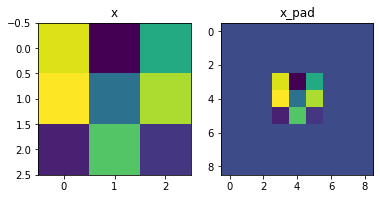

In [3]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 3)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1, 1])
print ("x_pad[1,1] =\n", x_pad[1, 1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0, :, :, 0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0, :, :, 0])


## Zero Padding in Tensorflow

In [4]:
# importing the library
import tensorflow as tf

# Initializing the Input
input = tf.constant([[1, 2], [3, 4]])
padding = tf.constant([[2, 2], [2, 2]])

# Printing the Input
print("Input: ", input)
print("Padding: ", padding)

# Generating padded Tensor
res = tf.pad(input, padding, mode ='CONSTANT')

# Printing the resulting Tensors
print("Res: ", res )


Input:  tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
Padding:  tf.Tensor(
[[2 2]
 [2 2]], shape=(2, 2), dtype=int32)
Res:  tf.Tensor(
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 2 0 0]
 [0 0 3 4 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]], shape=(6, 6), dtype=int32)


## Zero Padding in Keras


In [5]:
input_shape = (1, 1, 2, 2)
x = np.arange(np.prod(input_shape)).reshape(input_shape)
print(x)


[[[[0 1]
   [2 3]]]]


In [6]:
y = tf.keras.layers.ZeroPadding2D(padding=1)(x)

In [7]:
print(y)

tf.Tensor(
[[[[0 0]
   [0 0]
   [0 0]
   [0 0]]

  [[0 0]
   [0 1]
   [2 3]
   [0 0]]

  [[0 0]
   [0 0]
   [0 0]
   [0 0]]]], shape=(1, 3, 4, 2), dtype=int32)


## Zero Padding in Pytorch

In [8]:
# Import the required library
import torch
import torch.nn as nn

# define 3D tensor (C,H,W)
input = torch.tensor([[[ 1, 2],[ 3, 4]]])
print("Input Tensor:\n",input)

# define padding same for all sides (left, right, top, bottom)
pad = nn.ZeroPad2d(2)

# pad the input tensor
output = pad(input)
print("Padded Tensor:\n", output)

Input Tensor:
 tensor([[[1, 2],
         [3, 4]]])
Padded Tensor:
 tensor([[[0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 1, 2, 0, 0],
         [0, 0, 3, 4, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0]]])


# What is convolution matrix or kernel?

<img src="kernel.png" ><caption><center> <u> <font color='purple'> <b>Figure 2a</b> </u><font color='purple'>  : <b>Convolution operation</b><br> Convolution between an input image and a kernel </center></caption>

 A kernel describes a filter that we are going to pass over an input image. To make it simple, the kernel will move over the whole image, from left to right, from top to bottom by applying a convolution product. The output of this operation is called a filtered image.

   In image processing kernel is a convolution matrix or masks which can be used for blurring, sharpening, embossing, edge detection, and more by doing a convolution between a kernel and an image.

<a name='3-2'></a>
### 3.2 - Single Step of Convolution 

In this part, implement a single step of convolution, in which you apply the filter to a single position of the input. 

This will be used to build a convolutional unit, which: 

- Takes an input volume 
- Applies a filter at every position of the input
- Outputs another volume (usually of different size)

<img src="images/Convolution_schematic.gif" style="width:500px;height:300px;">
<caption><center> <u> <font color='purple'> <b>Figure 2b</b> </u><font color='purple'>  : <b>Convolution operation</b><br> with a filter of 3x3 and a stride of 1 (stride = amount you move the window each time you slide) </center></caption>

In a computer vision application, each value in the matrix on the left corresponds to a single pixel value. You convolve a 3x3 filter with the image by multiplying its values element-wise with the original matrix, then summing them up and adding a bias.
    
We will implement a single step of convolution, corresponding to applying a filter to just one of the positions to get a single real-valued output. 

Later in this notebook, we will apply this function to multiple positions of the input to implement the full convolutional operation. 
<img src="conv.gif" >
    <caption><center> <u> <font color='purple'> <b>Figure 2c</b> </u><font color='purple'>  </caption>
<a name='ex-2'></a>
Example of a 3 by 3 convolution kernel filtering a 9 by 9 image. Then this kernel moves all over the image to capture in the image all squares of the same size (3 by 3). 
    
### Convolution single step

    


In [9]:
def conv_single_step(a_slice_prev, W, b):
    """
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    
    Arguments:
    a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
    W -- Weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
    b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)
    
    Returns:
    Z -- a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data
    """
    # Element-wise product between a_slice_prev and W. Do not add the bias yet.
    s = np.multiply(a_slice_prev, W) 
    # Sum over all entries of the volume s.
    Z = np.sum(s)
    # Add bias b to Z. Cast b to a float() so that Z results in a scalar value.
    Z = Z + float(b)
    return Z

**Note**: The variable b will be passed in as a numpy array.  If you add a scalar (a float or integer) to a numpy array, the result is a numpy array.  In the special case of a numpy array containing a single value, you can cast it as a float to convert it to a scalar. [More info](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sum.html).

In [10]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)
Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)


Z = -6.999089450680221


What does convolving an image with a filter do? We can start by using the example 3x3 filter we’ve been using, which is commonly known as the vertical Sobel filter:


<img src="vertical-sobel.svg" >
The vertical Sobel filter
Here’s an example of what the vertical Sobel filter does:
<img src="lena.webp" >
Lenna vertical
An image convolved with the vertical Sobel filter

<a name='3-3'></a>
### 3.3 - Convolutional Neural Networks - Forward Pass

In the forward pass, you will take many filters and convolve them on the input. Each 'convolution' gives you a 2D matrix output. You will then stack these outputs to get a 3D volume: 
<img src="images/conv_kiank.gif" style="width:500px;height:300px;">
<caption><center> <u> <font color='purple'> <b>Figure 3</b> </u><font color='purple'>  : <b>How convolution works</b><br>  </center></caption>



<a name='ex-3'></a>
### Convolution forward
Let us implement the function  to convolve the filters `W` on an input activation `A_prev`.  
This function takes the following inputs:
* `A_prev`, the activations output by the previous layer (for a batch of m inputs); 
* Weights are denoted by `W`.  The filter window size is `f` by `f`.
* The bias vector is `b`, where each filter has its own (single) bias. 


To define a_slicew we will need to first define its corners `vert_start`, `vert_end`, `horiz_start` and `horiz_end`. 
This figure may be helpful for you to find out how each of the corners can be defined using h, w, f and s in the code below.
<img src="images/vert_horiz_kiank.png" style="width:400px;height:300px;">
<caption><center> <u> <font color='purple'> <b>Figure 3</b> </u><font color='purple'>  : <b>Definition of a slice using vertical and horizontal start/end (with a 2x2 filter)</b> <br> This figure shows only a single channel.  </center></caption>

The formulas relating the output shape of the convolution to the input shape are:
    
$$n_H = \Bigl\lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \Bigr\rfloor +1$$
$$n_W = \Bigl\lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \Bigr\rfloor +1$$
$$n_C = \text{number of filters used in the convolution}$$
   

In [11]:
def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev -- output activations of the previous layer, 
        numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W -- Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b -- Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters -- python dictionary containing "stride" and "pad"
        
    Returns:
    Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward() function
    """
    # Retrieve dimensions from A_prev's shape  
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Retrieve dimensions from W's shape 
    (f, f, n_C_prev, n_C) = W.shape
    
    # Retrieve information from "hparameters" 
    stride = hparameters['stride']
    pad =  hparameters['pad']
    
    # Compute the dimensions of the CONV output volume using the formula given above. 
    # Hint: use int() to apply the 'floor' operation. 
    n_H = int((n_H_prev - f + 2 * pad) / stride) + 1
    n_W = int((n_W_prev - f + 2 * pad) / stride) + 1
    
    # Initialize the output volume Z with zeros. 
    Z = np.zeros((m, n_H, n_W, n_C))
    
    # Create A_prev_pad by padding A_prev
    A_prev_pad = zero_pad(A_prev, pad)
    for i in range(m):               # loop over the batch of training examples
        a_prev_pad = A_prev_pad[i]   # Select ith training example's padded activation
        for h in range(n_H):         # loop over vertical axis of the output volume
            # Find the vertical start and end of the current "slice" (≈2 lines)
            vert_start = h * stride
            vert_end = vert_start + f
            for w in range(n_W):    # loop over horizontal axis of the output volume
                # Find the horizontal start and end of the current "slice" (≈2 lines)
                horiz_start = stride * w
                horiz_end = stride * w + f
                for c in range(n_C):   # loop over channels (= #filters) of the output volume
                    #Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). (≈1 line)
                    a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. (≈3 line)
                    weights = W[...,c]
                    biases = b[...,c]
                    Z[i, h, w, c] = conv_single_step(a_slice_prev,weights , biases) 
    
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [12]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 7, 4)
W = np.random.randn(3, 3, 4, 8)
b = np.random.randn(1, 1, 1, 8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =\n", np.mean(Z))
print("Z[0,2,1] =\n", Z[0, 2, 1])
print("cache_conv[0][1][2][3] =\n", cache_conv[0][1][2][3])


Z's mean =
 0.5511276474566768
Z[0,2,1] =
 [-2.17796037  8.07171329 -0.5772704   3.36286738  4.48113645 -2.89198428
 10.99288867  3.03171932]
cache_conv[0][1][2][3] =
 [-1.1191154   1.9560789  -0.3264995  -1.34267579]


Finally, a CONV layer should also contain an activation, in which case you would add the following line of code:

```python
# Convolve the window to get back one output neuron
Z[i, h, w, c] = ...
# Apply activation
A[i, h, w, c] = activation(Z[i, h, w, c])
```


## Convolution in Keras Conv2D

Keras Conv2D is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.

Mandatory Conv2D parameter is the numbers of filters that convolutional layers will learn from.
It is an integer value and also determines the number of output filters in the convolution.

Let’s import the necessary libraries and Conv2D class for our example

In [13]:
from keras.layers import Conv2D
import tensorflow as tf

Now we will provide an input to our Conv2D layer. We use tf.random.normal function to randomly initialize our input. Here input_shape is of the format (batch_size, height, width, filters).

In [14]:
input_shape = (4, 128, 128, 3)
X = tf.random.normal(input_shape)
print(X.shape)

(4, 128, 128, 3)


Output of the code is the same as input_shape: (4, 128, 128, 3)

Now, we calculate over convolution with following important parameters

In [15]:
Y = Conv2D(input_shape=input_shape, kernel_size=(2,2), filters=6, strides=(1, 1), padding="same")(X)
print(Y.shape)

(4, 128, 128, 6)


Let’s look at each parameter:

- input_shape=input_shape; to be provided only for the starting Conv2D block
- kernel_size=(2,2); the size of the array that is going to calculate convolutions on the input (X in this case)
- filters=6; # of channels in the output tensor
- strides=(1,1); strides of the convolution along height and width
- padding=”same”; keeps the (height, width) of output similar to input
Let’s change the filters and padding parameters to see the difference

In [16]:
Y = Conv2D(input_shape=input_shape, kernel_size=(2,2), filters=4, strides=(2,2), padding="valid")(X)
print(Y.shape)

(4, 64, 64, 4)


Conv2D is a basic building block of a CNN architecture and it has a huge scope of applications. This article is all about the basics of the Conv2D class

## Convolution in Tensorflow Conv2D

This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. 

When using this layer as the first layer in a model, provide the keyword argument input_shape (tuple of integers or None, does not include the sample axis), 

e.g. input_shape=(128, 128, 3) for 128x128 RGB pictures in data_format="channels_last".

You can use None when a dimension has variable size.

In [17]:
# The inputs are 28x28 RGB images with `channels_last` and the batch
# size is 4.
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(2, 3, activation='relu', input_shape=input_shape[1:])(x)
print(y.shape)

(4, 26, 26, 2)


## PyTorch Conv2d

Conv2d instance must be created where the value and stride of the parameter have to be passed in the system. These values are then applied to the input generated data.

m = Conv2d(in_channels, out_channels, kernel_size=(n, n), stride, padding, bias)

All of these parameters change up the convolution’s output, and each of them has a specific purpose,

- in_channels – Refers to the number of channels that are in the input image.
- out_channels – This field refers to the number of channels produced by the convolution.
- kernel_size – Used to provide the width and height of the filter mask.
- stride – This field controls the stride for the convolution.
- padding – It controls the amount of implicit zero-paddings on both sides for padding number of points for each dimension.
- bias – This field checks whether there exists a learnable bias to the output.
An example of using the Conv2d class is as follows,


In [18]:
# importing the class from the package
import torch
import torch. nn as nn

In [19]:
# using square kernels with an equal stride
a = nn.Conv2d(4, 16, 6, stride=2)

<a name='4'></a>
## 4 - Pooling Layer 

The pooling (POOL) layer reduces the height and width of the input. It helps reduce computation, as well as helps make feature detectors more invariant to its position in the input. The two types of pooling layers are: 

- Max-pooling layer: slides an ($f, f$) window over the input and stores the max value of the window in the output.

- Average-pooling layer: slides an ($f, f$) window over the input and stores the average value of the window in the output.

<table>
<td>
<img src="images/max_pool1.png" style="width:500px;height:300px;">
<td>

<td>
<img src="images/a_pool.png" style="width:500px;height:300px;">
<td>
</table>

These pooling layers have no parameters for backpropagation to train. However, they have hyperparameters such as the window size $f$. This specifies the height and width of the $f \times f$ window you would compute a *max* or *average* over. 


# Polling
Pooling ensures that the main features of the image are maintained while reducing the size of the image further. This reduces the amount of information passed to the neural network and hence helps to reduce overfitting.

<img src="pooling.png" style="width:500px;height:300px;">


The addition of a pooling layer after the convolutional layer is a common pattern used for ordering layers within a convolutional neural network that may be repeated one or more times in a given model.

The pooling layer operates upon each feature map separately to create a new set of the same number of pooled feature maps.

Pooling involves selecting a **pooling operation**, much like a filter to be applied to feature maps.


The size of the pooling operation or filter is smaller than the size of the feature map

This means that the pooling layer will always reduce the size of each feature map by a factor of 2, e.g. each dimension is halved, reducing the number of pixels or values in each feature map to one quarter the size. 


For example, a pooling layer applied to a feature map of 6×6 (36 pixels) will result in an output pooled feature map of 3×3 (9 pixels).

The pooling operation is specified, rather than learned. Two common functions used in the pooling operation are:

**Average Pooling**: Calculate the average value for each patch on the feature map.

**Maximum Pooling** (or Max Pooling): Calculate the maximum value for each patch of the feature map.

The result of using a pooling layer and creating down sampled or pooled feature maps is a summarized version of the features detected in the input. 

They are useful as small changes in the location of the feature in the input detected by the convolutional layer will result in a pooled feature map with the feature in the same location. This capability added by pooling is called the model’s invariance to local translation.

<a name='4-1'></a>
### 4.1 - Forward Pooling
Now, you are going to implement MAX-POOL and AVG-POOL, in the same function. 

<a name='ex-4'></a>
###  pool_forward 

We have to implement the forward pass of the pooling layer.

**Reminder**:
As there's no padding, the formulas binding the output shape of the pooling to the input shape is:

$$n_H = \Bigl\lfloor \frac{n_{H_{prev}} - f}{stride} \Bigr\rfloor +1$$

$$n_W = \Bigl\lfloor \frac{n_{W_{prev}} - f}{stride} \Bigr\rfloor +1$$

$$n_C = n_{C_{prev}}$$

In [20]:
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev -- Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters -- python dictionary containing "f" and "stride"
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A -- output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    
    # Retrieve dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Retrieve hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))              
    
    for i in range(m):                         # loop over the training examples
        for h in range(n_H):                     # loop on the vertical axis of the output volume
            # Find the vertical start and end of the current "slice" (≈2 lines)
            vert_start = h * stride
            vert_end = vert_start + f
            for w in range(n_W):                 # loop on the horizontal axis of the output volume
                # Find the vertical start and end of the current "slice" (≈2 lines)
                horiz_start = w * stride
                horiz_end = horiz_start + f
                for c in range (n_C):            # loop over the channels of the output volume
                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. (≈1 line)
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]
                    # Compute the pooling operation on the slice. 
                    # Use an if statement to differentiate the modes. 
                    # Use np.max and np.mean.
                    if mode == "max":
                         A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                         A[i, h, w, c] = np.mean(a_prev_slice)    
    

    
    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)
    
    # Making sure your output shape is correct
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [21]:
# Case 1: stride of 1
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters, mode = "max")
print("mode = max")
print("A.shape = " + str(A.shape))
print("A[1, 1] =\n", A[1, 1])
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A[1, 1] =\n", A[1, 1])



mode = max
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[1.96710175 0.84616065 1.27375593]
 [1.96710175 0.84616065 1.23616403]
 [1.62765075 1.12141771 1.2245077 ]]
mode = average
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[ 0.44497696 -0.00261695 -0.31040307]
 [ 0.50811474 -0.23493734 -0.23961183]
 [ 0.11872677  0.17255229 -0.22112197]]


In [22]:
# Case 2: stride of 2
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 2, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A[0] =\n", A[0])
print()

A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A[1] =\n", A[1])

mode = max
A.shape = (2, 2, 2, 3)
A[0] =
 [[[1.74481176 0.90159072 1.65980218]
  [1.74481176 1.6924546  1.65980218]]

 [[1.13162939 1.51981682 2.18557541]
  [1.13162939 1.6924546  2.18557541]]]

mode = average
A.shape = (2, 2, 2, 3)
A[1] =
 [[[-0.17313416  0.32377198 -0.34317572]
  [ 0.02030094  0.14141479 -0.01231585]]

 [[ 0.42944926  0.08446996 -0.27290905]
  [ 0.15077452  0.28911175  0.00123239]]]


<font color='blue'>
    
**What we should remember**:

* A convolution extracts features from an input image by taking the dot product between the input data and a 3D array of weights (the filter). 
* The 2D output of the convolution is called the feature map
* A convolution layer is where the filter slides over the image and computes the dot product 
    * This transforms the input volume into an output volume of different size 
* Zero padding helps keep more information at the image borders, and is helpful for building deeper networks, because you can build a CONV layer without shrinking the height and width of the volumes
* Pooling layers gradually reduce the height and width of the input by sliding a 2D window over each specified region, then summarizing the features in that region

# Keras - Pooling Layer

It is used to perform max pooling operations on temporal data. The signature of the MaxPooling1D function and its arguments with default value is as follows −
```
keras.layers.MaxPooling1D (
   pool_size = 2, 
   strides = None, 
   padding = 'valid', 
   data_format = 'channels_last'
)
```
Here,

pool_size refers the max pooling windows.

strides refer the factors for downscale.

Similarly, MaxPooling2D and MaxPooling3D are used for Max pooling operations for spatial data.

### Detecting Vertical Lines
Before we look at some examples of pooling layers and their effects, let’s develop a small example of an input image and convolutional layer to which we can later add and evaluate pooling layers.

In this example, we define a single input image or sample that has one channel and is an 8 pixel by 8 pixel square with all 0 values and a two-pixel wide vertical line in the center.

In [23]:
from numpy import asarray
from keras.models import Sequential
from keras.layers import Conv2D
# define input data
data = [[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0]]
data = asarray(data)
data = data.reshape(1, 8, 8, 1)
# create model
model = Sequential()
model.add(Conv2D(1, (3,3), activation='relu', input_shape=(8, 8, 1)))
# summarize model
model.summary()
# define a vertical line detector
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
weights = [asarray(detector), asarray([0.0])]
# store the weights in the model
model.set_weights(weights)
# apply filter to input data
yhat = model.predict(data)
# enumerate rows
for r in range(yhat.shape[1]):
	# print each column in the row
	print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 6, 6, 1)           10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]


Running the example first summarizes the structure of the model.

Of note is that the single hidden convolutional layer will take the 8×8 pixel input image and will produce a feature map with the dimensions of 6×6.

We can also see that the layer has 10 parameters: that is nine weights for the filter (3×3) and one weight for the bias.

Finally, the single feature map is printed.

We can see from reviewing the numbers in the 6×6 matrix that indeed the manually specified filter detected the vertical line in the middle of our input image.


### Average Pooling Layer
On two-dimensional feature maps, pooling is typically applied in 2×2 patches of the feature map with a stride of (2,2).

Average pooling involves calculating the average for each patch of the feature map. This means that each 2×2 square of the feature map is down sampled to the average value in the square.

For example, the output of the line detector convolutional filter in the previous section was a 6×6 feature map. We can look at applying the average pooling operation to the first line of that feature map manually.

In [24]:
from numpy import asarray
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import AveragePooling2D
# define input data
data = [[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0]]
data = asarray(data)
data = data.reshape(1, 8, 8, 1)
# create model
model = Sequential()
model.add(Conv2D(1, (3,3), activation='relu', input_shape=(8, 8, 1)))
model.add(AveragePooling2D())
# summarize model
model.summary()
# define a vertical line detector
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
weights = [asarray(detector), asarray([0.0])]
# store the weights in the model
model.set_weights(weights)
# apply filter to input data
yhat = model.predict(data)
# enumerate rows
for r in range(yhat.shape[1]):
	# print each column in the row
	print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 6, 6, 1)           10        
                                                                 
 average_pooling2d (AverageP  (None, 3, 3, 1)          0         
 ooling2D)                                                       
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]


We can see from the model summary that the input to the pooling layer will be a single feature map with the shape (6,6) and that the output of the average pooling layer will be a single feature map with each dimension halved, with the shape (3,3).

Applying the average pooling results in a new feature map that still detects the line, although in a down sampled manner, exactly as we expected from calculating the operation manually.

## Pooling with Pytorch
It is common practice to use either max pooling or average pooling at the end of a neural network but before the output layer in order to reduce the features to a smaller, summarized form.


**Max pooling** strips away all information of the specified kernel except for the strongest signal.


**Average pooling** summarizes the signal in the kernel to a single average.



In [25]:
import torch.nn as nn

class Convolutional(nn.Module):
    def __init__(self, input_channels=3, num_classes=10):
        super(Convolutional, self).__init__()
        self.layer1 = nn.Sequential()
        self.layer1.add_module("Conv1", nn.Conv2d(in_channels=input_channels, out_channels=16, kernel_size=3, padding=1))
        self.layer1.add_module("BN1", nn.BatchNorm2d(num_features=16, eps=1e-05, momentum=0.1, affine=True,
            track_running_stats=True))
        self.layer1.add_module("Relu1", nn.ReLU(inplace=False))
        self.layer2 = nn.Sequential()
        self.layer2.add_module("Conv2", nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1, stride=2))
        self.layer2.add_module("BN2", nn.BatchNorm2d(num_features=32, eps=1e-05, momentum=0.1, affine=True,
            track_running_stats=True))
        self.layer2.add_module("Relu2", nn.ReLU(inplace=False))
        self.avg_pool("AvgPool1", nn.AvgPool2D(kernel_size=4, stride=4, padding=0, ceil_mode=False,
            count_include_pad=False))
        self.fully_connected = nn.Linear(32 * 4 * 4, num_classes)
    def forward(self, x):
        y = x.clone()
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.avg_pool(x)
        x = x.view(-1, 32 * 4 * 4)
        x = self.fully_connected(x)
        return x

we can see that the AvgPool2D function
```
self.avg_pool("AvgPool1", nn.AvgPool2D(kernel_size=4, stride=4, padding=0, ceil_mode=False,
            count_include_pad=False))
```
is used to perform average pooling on the output of the second convolutional layer.

## Rectified Linear Activation Function (RELU)
In order to use stochastic gradient descent with backpropagation of errors to train deep neural networks, an activation function is needed that looks and acts like a linear function, but is, in fact, a nonlinear function allowing complex relationships in the data to be learned.

The function must also provide more sensitivity to the activation sum input and avoid easy saturation.
The solution is to use the rectified linear activation function, or ReL for short.
A node or unit that implements this activation function is referred to as a rectified linear activation unit, or ReLU for short. Often, networks that use the rectifier function for the hidden layers are referred to as rectified networks.



In [26]:
# rectified linear function
def rectified(x):
	return max(0.0, x)
 
# demonstrate with a positive input
x = 1.0
print('rectified(%.1f) is %.1f' % (x, rectified(x)))
x = 1000.0
print('rectified(%.1f) is %.1f' % (x, rectified(x)))
# demonstrate with a zero input
x = 0.0
print('rectified(%.1f) is %.1f' % (x, rectified(x)))
# demonstrate with a negative input
x = -1.0
print('rectified(%.1f) is %.1f' % (x, rectified(x)))
x = -1000.0
print('rectified(%.1f) is %.1f' % (x, rectified(x)))

rectified(1.0) is 1.0
rectified(1000.0) is 1000.0
rectified(0.0) is 0.0
rectified(-1.0) is 0.0
rectified(-1000.0) is 0.0


Running the example, we can see that positive values are returned regardless of their size, whereas negative values are snapped to the value 0.0.

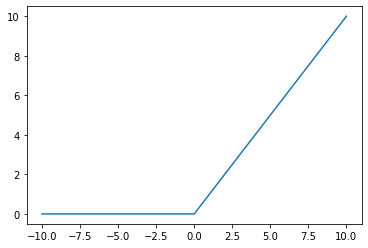

In [27]:
# plot inputs and outputs
from matplotlib import pyplot
 
# rectified linear function
def rectified(x):
	return max(0.0, x)
 
# define a series of inputs
series_in = [x for x in range(-10, 11)]
# calculate outputs for our inputs
series_out = [rectified(x) for x in series_in]
# line plot of raw inputs to rectified outputs
pyplot.plot(series_in, series_out)
pyplot.show()

<a name='5'></a>
## 5 - Backpropagation in Convolutional Neural Networks 

In modern deep learning frameworks, we have to implement the forward pass, and the framework takes care of the backward pass, so most deep learning engineers don't need to bother with the details of the backward pass.


<a name='5-1'></a>
### 5.1 - Convolutional Layer Backward Pass 

Let's start by implementing the backward pass for a CONV layer. 

<a name='5-1-1'></a>
#### 5.1.1 - Computing dA:
This is the formula for computing $dA$ with respect to the cost for a certain filter $W_c$ and a given training example:

$$dA \mathrel{+}= \sum _{h=0} ^{n_H} \sum_{w=0} ^{n_W} W_c \times dZ_{hw} \tag{1}$$

Where $W_c$ is a filter and $dZ_{hw}$ is a scalar corresponding to the gradient of the cost with respect to the output of the conv layer Z at the hth row and wth column (corresponding to the dot product taken at the ith stride left and jth stride down). Note that at each time, you multiply the the same filter $W_c$ by a different dZ when updating dA. We do so mainly because when computing the forward propagation, each filter is dotted and summed by a different a_slice. Therefore when computing the backprop for dA, you are just adding the gradients of all the a_slices. 

In code, inside the appropriate for-loops, this formula translates into:
```python
da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += W[:,:,:,c] * dZ[i, h, w, c]
```

<a name='5-1-2'></a>
#### 5.1.2 - Computing dW:
This is the formula for computing $dW_c$ ($dW_c$ is the derivative of one filter) with respect to the loss:

$$dW_c  \mathrel{+}= \sum _{h=0} ^{n_H} \sum_{w=0} ^ {n_W} a_{slice} \times dZ_{hw}  \tag{2}$$

Where $a_{slice}$ corresponds to the slice which was used to generate the activation $Z_{ij}$. Hence, this ends up giving us the gradient for $W$ with respect to that slice. Since it is the same $W$, we will just add up all such gradients to get $dW$. 

In code, inside the appropriate for-loops, this formula translates into:
```python
dW[:,:,:,c] \mathrel{+}= a_slice * dZ[i, h, w, c]
```

<a name='5-1-3'></a>
#### 5.1.3 - Computing db:

This is the formula for computing $db$ with respect to the cost for a certain filter $W_c$:

$$db = \sum_h \sum_w dZ_{hw} \tag{3}$$

As you have previously seen in basic neural networks, db is computed by summing $dZ$. In this case, you are just summing over all the gradients of the conv output (Z) with respect to the cost. 

In code, inside the appropriate for-loops, this formula translates into:
```python
db[:,:,:,c] += dZ[i, h, w, c]
```

<a name='ex-5'></a>
### conv_backward

We have to  sum over all the training examples, filters, heights, and widths. Then compute the derivatives using formulas 1, 2 and 3 above. 

In [28]:
def conv_backward(dZ, cache):
    """
    Implement the backward propagation for a convolution function
    
    Arguments:
    dZ -- gradient of the cost with respect to the output of the conv layer (Z), numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward(), output of conv_forward()
    
    Returns:
    dA_prev -- gradient of the cost with respect to the input of the conv layer (A_prev),
               numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    dW -- gradient of the cost with respect to the weights of the conv layer (W)
          numpy array of shape (f, f, n_C_prev, n_C)
    db -- gradient of the cost with respect to the biases of the conv layer (b)
          numpy array of shape (1, 1, 1, n_C)
    """    
    # Retrieve information from "cache"
    (A_prev, W, b, hparameters) = cache
    # Retrieve dimensions from A_prev's shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    # Retrieve dimensions from W's shape
    (f, f, n_C_prev, n_C) = W.shape
    
    # Retrieve information from "hparameters"
    stride = hparameters["stride"]
    pad = hparameters["pad"]
    
    # Retrieve dimensions from dZ's shape
    (m, n_H, n_W, n_C) = dZ.shape
    
    # Initialize dA_prev, dW, db with the correct shapes
    dA_prev = np.zeros((m, n_H_prev, n_W_prev, n_C_prev))                           
    dW = np.zeros((f, f, n_C_prev, n_C))
    db = np.zeros((1, 1, 1, n_C))
    
    # Pad A_prev and dA_prev
    A_prev_pad = zero_pad(A_prev, pad)
    dA_prev_pad = zero_pad(dA_prev, pad)
    
    for i in range(m):                       # loop over the training examples
        
        # select ith training example from A_prev_pad and dA_prev_pad
        a_prev_pad = A_prev_pad[i]
        da_prev_pad = dA_prev_pad[i]
        
        for h in range(n_H):                   # loop over vertical axis of the output volume
            for w in range(n_W):               # loop over horizontal axis of the output volume
                for c in range(n_C):           # loop over the channels of the output volume
                    
                    # Find the corners of the current "slice"
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    # Use the corners to define the slice from a_prev_pad
                    a_slice = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]
                    # Update gradients for the window and the filter's parameters using the code formulas given above
                    da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += W[:,:,:,c] * dZ[i, h, w, c]
                    dW[:,:,:,c] += a_slice * dZ[i, h, w, c]
                    db[:,:,:,c] += dZ[i, h, w, c]
                    
        # Set the ith training example's dA_prev to the unpadded da_prev_pad (Hint: use X[pad:-pad, pad:-pad, :])
        dA_prev[i, :, :, :] = da_prev_pad[pad:-pad, pad:-pad, :]   
    # Making sure your output shape is correct
    assert(dA_prev.shape == (m, n_H_prev, n_W_prev, n_C_prev))
    return dA_prev, dW, db

In [29]:
# We'll run conv_forward to initialize the 'Z' and 'cache_conv",
# which we'll use to test the conv_backward function
np.random.seed(1)
A_prev = np.random.randn(10, 4, 4, 3)
W = np.random.randn(2, 2, 3, 8)
b = np.random.randn(1, 1, 1, 8)
hparameters = {"pad" : 2,
               "stride": 2}
Z, cache_conv = conv_forward(A_prev, W, b, hparameters)

# Test conv_backward
dA, dW, db = conv_backward(Z, cache_conv)

print("dA_mean =", np.mean(dA))
print("dW_mean =", np.mean(dW))
print("db_mean =", np.mean(db))



dA_mean = 1.4524377775388075
dW_mean = 1.7269914583139097
db_mean = 7.839232564616838


<a name='5-2'></a>
## 5.2 Pooling Layer - Backward Pass

Next, let's implement the backward pass for the pooling layer, starting with the MAX-POOL layer. Even though a pooling layer has no parameters for backprop to update, you still need to backpropagate the gradient through the pooling layer in order to compute gradients for layers that came before the pooling layer. 

<a name='5-2-1'></a>
### 5.2.1 Max Pooling - Backward Pass  

Before jumping into the backpropagation of the pooling layer, you are going to build a helper function called `create_mask_from_window()` which does the following: 

$$ X = \begin{bmatrix}
1 && 3 \\
4 && 2
\end{bmatrix} \quad \rightarrow  \quad M =\begin{bmatrix}
0 && 0 \\
1 && 0
\end{bmatrix}\tag{4}$$

As you can see, this function creates a "mask" matrix which keeps track of where the maximum of the matrix is. True (1) indicates the position of the maximum in X, the other entries are False (0). You'll see later that the backward pass for average pooling is similar to this, but uses a different mask.  

<a name='ex-6'></a>


We implement `create_mask_from_window()`. This function will be helpful for pooling backward. 
- [np.max()]() may be helpful. It computes the maximum of an array.
- If you have a matrix X and a scalar x: `A = (X == x)` will return a matrix A of the same size as X such that:
```
A[i,j] = True if X[i,j] = x
A[i,j] = False if X[i,j] != x
```
- Here, you don't need to consider cases where there are several maxima in a matrix.

In [30]:
def create_mask_from_window(x):
    """
    Creates a mask from an input matrix x, to identify the max entry of x.
    
    Arguments:
    x -- Array of shape (f, f)
    
    Returns:
    mask -- Array of the same shape as window, contains a True at the position corresponding to the max entry of x.
    """    

    mask = x == np.max(x)
    

    return mask

In [31]:
np.random.seed(1)
x = np.random.randn(2, 3)
mask = create_mask_from_window(x)
print('x = ', x)
print("mask = ", mask)

x = np.array([[-1, 2, 3],
              [2, -3, 2],
              [1, 5, -2]])

y = np.array([[False, False, False],
     [False, False, False],
     [False, True, False]])
mask = create_mask_from_window(x)




x =  [[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]
mask =  [[ True False False]
 [False False False]]


Why keep track of the position of the max? It's because this is the input value that ultimately influenced the output, and therefore the cost. Backprop is computing gradients with respect to the cost, so anything that influences the ultimate cost should have a non-zero gradient. So, backprop will "propagate" the gradient back to this particular input value that had influenced the cost. 

<a name='5-2-2'></a>
### 5.2.2 - Average Pooling - Backward Pass 

In max pooling, for each input window, all the "influence" on the output came from a single input value--the max. In average pooling, every element of the input window has equal influence on the output. So to implement backprop, you will now implement a helper function that reflects this.

For example if we did average pooling in the forward pass using a 2x2 filter, then the mask you'll use for the backward pass will look like: 
$$ dZ = 1 \quad \rightarrow  \quad dZ =\begin{bmatrix}
1/4 && 1/4 \\
1/4 && 1/4
\end{bmatrix}\tag{5}$$

This implies that each position in the $dZ$ matrix contributes equally to output because in the forward pass, we took an average. 

<a name='ex-7'></a>
### Distribute_value

Implement the function below to equally distribute a value dz through a matrix of dimension shape. [info](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ones.html)

In [32]:
def distribute_value(dz, shape):
    """
    Distributes the input value in the matrix of dimension shape
    
    Arguments:
    dz -- input scalar
    shape -- the shape (n_H, n_W) of the output matrix for which we want to distribute the value of dz
    
    Returns:
    a -- Array of size (n_H, n_W) for which we distributed the value of dz
    """    
    # Retrieve dimensions from shape (≈1 line)
    (n_H, n_W) = shape
    # Compute the value to distribute on the matrix (≈1 line)
    average = dz / (n_H * n_W)
    # Create a matrix where every entry is the "average" value (≈1 line)
    a = np.ones(shape) * average    
    return a

In [33]:
a = distribute_value(2, (2, 2))
print('distributed value =', a)

distributed value = [[0.5 0.5]
 [0.5 0.5]]


<a name='5-2-3'></a>
### 5.2.3 Putting it Together: Pooling Backward 

You now have everything you need to compute backward propagation on a pooling layer.

<a name='ex-8'></a>
### pool_backward

Implement the `pool_backward` function in both modes (`"max"` and `"average"`). You will once again use 4 for-loops (iterating over training examples, height, width, and channels). You should use an `if/elif` statement to see if the mode is equal to `'max'` or `'average'`. If it is equal to 'average' you should use the `distribute_value()` function you implemented above to create a matrix of the same shape as `a_slice`. Otherwise, the mode is equal to '`max`', and you will create a mask with `create_mask_from_window()` and multiply it by the corresponding value of dA.

In [34]:
def pool_backward(dA, cache, mode = "max"):
    """
    Implements the backward pass of the pooling layer
    
    Arguments:
    dA -- gradient of cost with respect to the output of the pooling layer, same shape as A
    cache -- cache output from the forward pass of the pooling layer, contains the layer's input and hparameters 
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    dA_prev -- gradient of cost with respect to the input of the pooling layer, same shape as A_prev
    """

    # Retrieve information from cache (≈1 line)
    (A_prev, hparameters) = cache
    
    # Retrieve hyperparameters from "hparameters" (≈2 lines)
    stride = hparameters["stride"]
    f = hparameters["f"]
    
    # Retrieve dimensions from A_prev's shape and dA's shape (≈2 lines)
    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
    m, n_H, n_W, n_C = dA.shape
    
    # Initialize dA_prev with zeros (≈1 line)
    dA_prev = np.zeros(A_prev.shape)
    
    for i in range(m): # loop over the training examples
        
        # select training example from A_prev (≈1 line)
        a_prev = A_prev[i]
        
        for h in range(n_H):                   # loop on the vertical axis
            for w in range(n_W):               # loop on the horizontal axis
                for c in range(n_C):           # loop over the channels (depth)
        
                    # Find the corners of the current "slice" (≈4 lines)
                    vert_start = h
                    vert_end = vert_start + f
                    horiz_start = w
                    horiz_end = horiz_start + f
                    
                    # Compute the backward propagation in both modes.
                    if mode == "max":
                        
                        # Use the corners and "c" to define the current slice from a_prev (≈1 line)
                        a_prev_slice = a_prev[vert_start:vert_end, horiz_start:horiz_end, c]
                        
                        # Create the mask from a_prev_slice (≈1 line)
                        mask = create_mask_from_window(a_prev_slice)

                        # Set dA_prev to be dA_prev + (the mask multiplied by the correct entry of dA) (≈1 line)
                        dA_prev[i, vert_start: vert_end, horiz_start: horiz_end, c] += np.multiply(mask, dA[i, h, w, c])
                        
                    elif mode == "average":
                        
                        # Get the value da from dA (≈1 line)
                        da = dA[i, h, w, c]
                        
                        # Define the shape of the filter as fxf (≈1 line)
                        shape = (f, f)

                        # Distribute it to get the correct slice of dA_prev. i.e. Add the distributed value of da. (≈1 line)
                        dA_prev[i, vert_start: vert_end, horiz_start: horiz_end, c] += distribute_value(da, shape)
 

    
    # Making sure your output shape is correct
    assert(dA_prev.shape == A_prev.shape)
    
    return dA_prev

In [35]:
np.random.seed(1)
A_prev = np.random.randn(5, 5, 3, 2)
hparameters = {"stride" : 1, "f": 2}
A, cache = pool_forward(A_prev, hparameters)
print(A.shape)
print(cache[0].shape)
dA = np.random.randn(5, 4, 2, 2)

dA_prev1 = pool_backward(dA, cache, mode = "max")
print("mode = max")
print('mean of dA = ', np.mean(dA))
print('dA_prev1[1,1] = ', dA_prev1[1, 1])  
print()
dA_prev2 = pool_backward(dA, cache, mode = "average")
print("mode = average")
print('mean of dA = ', np.mean(dA))
print('dA_prev2[1,1] = ', dA_prev2[1, 1]) 

assert type(dA_prev1) == np.ndarray, "Wrong type"
assert dA_prev1.shape == (5, 5, 3, 2), f"Wrong shape {dA_prev1.shape} != (5, 5, 3, 2)"
assert np.allclose(dA_prev1[1, 1], [[0, 0], 
                                    [ 5.05844394, -1.68282702],
                                    [ 0, 0]]), "Wrong values for mode max"
assert np.allclose(dA_prev2[1, 1], [[0.08485462,  0.2787552], 
                                    [1.26461098, -0.25749373], 
                                    [1.17975636, -0.53624893]]), "Wrong values for mode average"
print("\033[92m All tests passed.")

(5, 4, 2, 2)
(5, 5, 3, 2)
mode = max
mean of dA =  0.14571390272918056
dA_prev1[1,1] =  [[ 0.          0.        ]
 [ 5.05844394 -1.68282702]
 [ 0.          0.        ]]

mode = average
mean of dA =  0.14571390272918056
dA_prev2[1,1] =  [[ 0.08485462  0.2787552 ]
 [ 1.26461098 -0.25749373]
 [ 1.17975636 -0.53624893]]
 All tests passed.


## How to use Same / Zero Padding with Keras?
Building a model with Keras often consists of three steps:

- Instantiating the model, e.g. with the Sequential API;
- Stacking the layers on top of each other;
- Compiling the model.

So, for example, a simple model with three convolutional layers using the Keras Sequential API always starts with the Sequential instantiation:

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Activation, Flatten
# Create the model
model = Sequential()
#After which the Conv layers are added. 
#In our case, they are Conv2D again, with 'same' as the value 
#for padding for all three layers:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
#Then, like the "valid" padding scenario,
#we add a Flatten layer and two Dense ones, 
#ending with a Softmax activated output:
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 4, 28, 28, 32)     896       
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 28, 28, 64)     18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 28, 28, 128)    73856     
                                                                 
 flatten (Flatten)           (None, 401408)            0         
                                                                 
 dense (Dense)               (None, 256)               102760704 
                                                                 
Total params: 102,853,952
Trainable params: 102,853,952
Non-trainable params: 0
_________________________________________________________________


**Congratulations**!  He have studied some aspects of convolution models.

Additional References:
- https://pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/
- https://cnvrg.io/cnn-tensorflow/-
- https://www.jessicayung.com/explaining-tensorflow-code-for-a-convolutional-neural-network/
- https://victorzhou.com/blog/keras-cnn-tutorial/